# 분류 (classification)
- 입력 데이터를 미리 정의된 여러 크랠스 중 하나로 예측하는 것
(범주형 데이터)
    - 이진 분류 양성(1), 음성(0) 중에 하나를 맞추는 것
    - 다중 분류: 여러 클래스 중 하나를 맞추는 것

### Logisitic Regression
-  선형 회귀 방식으로 분류 문제를 해결하는 모델
    - 이진 분류: 로지스틱함수(시그모이드)를 통해 계산하고 분류
    - 다중분류: 소프트맥스 함수로 각 클래스별 확률 계산해 분류

**하이퍼 파라미터**

<table>
  <thead>
    <tr>
      <th>하이퍼파라미터</th>
      <th>설명</th>
      <th>기본값</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>penalty</code></td>
      <td>정규화의 종류 지정 / <code>'l1'</code>, <code>'l2'</code>, <code>'elasticnet'</code>, <code>'none'</code> 중 선택</td>
      <td><code>'l2'</code></td>
    </tr>
    <tr>
      <td><code>C</code></td>
      <td>정규화의 강도를 제어 / 값이 작을수록 강한 정규화 적용 (<code>1 / λ</code>로 해석 가능)</td>
      <td><code>1.0</code></td>
    </tr>
    <tr>
      <td><code>solver</code></td>
      <td>최적화 알고리즘 선택 / <code>'newton-cg'</code>, <code>'lbfgs'</code>, <code>'liblinear'</code>, <code>'sag'</code>, <code>'saga'</code> 중 선택</td>
      <td><code>'lbfgs'</code></td>
    </tr>
    <tr>
      <td><code>max_iter</code></td>
      <td>최적화를 위한 최대 반복 횟수</td>
      <td><code>100</code></td>
    </tr>
    <tr>
      <td><code>multi_class</code></td>
      <td>다중 클래스 문제에서 사용할 전략 / <code>'auto'</code>, <code>'ovr'</code> (one-vs-rest), <code>'multinomial'</code> 중 선택</td>
      <td><code>'auto'</code></td>
    </tr>
    <tr>
      <td><code>fit_intercept</code></td>
      <td>절편을 학습할지 여부 / <code>True</code> 또는 <code>False</code></td>
      <td><code>True</code></td>
    </tr>
  </tbody>
</table>

**solver**

<table>
  <thead>
    <tr>
      <th>Solver</th>
      <th>설명</th>
      <th>특징</th>
      <th>추천 사용 상황</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>liblinear</strong></td>
      <td>선형 분류를 위한 라이브러리인 "LIBLINEAR"에서 유래, 작은 데이터셋이나 희소 데이터셋에 적합한 이중 좌표축 감소법(Dual Coordinate Descent Algorithm) 사용</td>
      <td>빠르고 메모리 효율적이며, L1 및 L2 정규화 모두를 지원</td>
      <td>작은 크기의 데이터셋, 희소한 피처를 가진 데이터셋</td>
    </tr>
    <tr>
      <td><strong>newton-cg</strong></td>
      <td>Newton Conjugate Gradient 뉴턴법을 사용한 최적화 알고리즘, 큰 데이터셋에서도 효율적으로 동작</td>
      <td>L2 정규화를 지원하며, 대규모 데이터셋에 적합</td>
      <td>중대형 크기의 데이터셋</td>
    </tr>
    <tr>
      <td><strong>lbfgs</strong></td>
      <td>Broyden-Fletcher-Goldfarb-Shanno(BFGS) 알고리즘의 변형인 L-BFGS(Limited-memory Broyden–Fletcher–Goldfarb–Shanno) 알고리즘을 사용</td>
      <td>L2 정규화를 지원하며, 메모리를 절약하면서도 효율적인 성능을 발휘</td>
      <td>대규모 데이터셋, 다중 클래스 분류</td>
    </tr>
    <tr>
      <td><strong>sag</strong></td>
      <td>Stochastic Average Gradient 하강법으로, 점진적으로 평균 그래디언트를 사용하여 최적화</td>
      <td>매우 큰 데이터셋에서 효율적이며, L2 정규화를 지원</td>
      <td>매우 큰 크기의 데이터셋</td>
    </tr>
    <tr>
      <td><strong>saga</strong></td>
      <td>Stochastic Average Gradient Augmented / sag의 확장판으로, L1 및 L2 정규화 모두를 지원</td>
      <td>희소 데이터셋에도 적합하며, 매우 큰 데이터셋에서 효율적</td>
      <td>매우 큰 크기의 데이터셋, 희소한 피처를 가진 데이터셋</td>
    </tr>
  </tbody>
</table>

### 시그모이드
$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

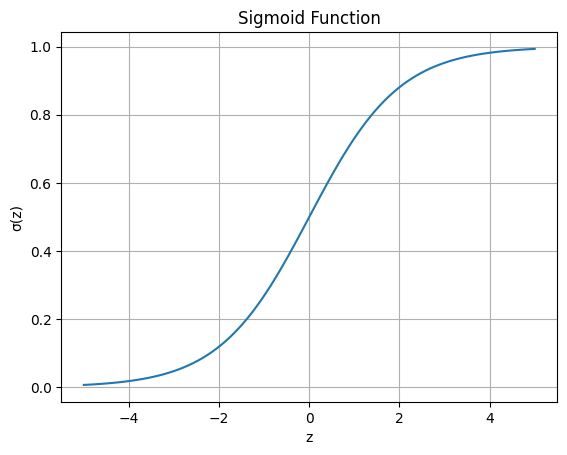

In [2]:
# 시그모이드 시각화
z = np.linspace(-5, 5, 100)
sigmoid_value = 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid_value)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid()
plt.show()

In [6]:
df = pd.read_csv('../../data/fish.csv')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 입력(X), 타겟(y) 분리
X = df.drop('Species', axis=1)
y = df['Species']

# 데이터 분할 (학습/테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 다중분류 로지스틱 회귀 모델 학습
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
clf.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = clf.predict(X_test_scaled)
print(clf.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

0.875
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       1.00      1.00      1.00         1
       Perch       0.69      1.00      0.82         9
        Pike       1.00      1.00      1.00         3
       Roach       0.00      0.00      0.00         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.88        32
   macro avg       0.67      0.71      0.69        32
weighted avg       0.79      0.88      0.82        32



c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Playdata\a

In [17]:
# 예측 확률 확인
print(clf.classes_)
for i, sample in enumerate(X_test_scaled[:5]):
    print(clf.predict_proba(sample.reshape(1, -1)).round(4))
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.values[i]}")

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.0037 0.0844 0.5552 0.0073 0.2856 0.055  0.0087]]
Predicted: Perch, Actual: Perch
[[2.000e-04 5.970e-02 1.314e-01 1.900e-03 8.570e-02 7.204e-01 7.000e-04]]
Predicted: Smelt, Actual: Smelt
[[0.0082 0.008  0.2148 0.5695 0.1814 0.0054 0.0126]]
Predicted: Pike, Actual: Pike
[[0.0596 0.0727 0.5249 0.0341 0.2678 0.0025 0.0384]]
Predicted: Perch, Actual: Whitefish
[[0.0037 0.0255 0.667  0.0238 0.252  0.0158 0.0121]]
Predicted: Perch, Actual: Perch


In [ ]:
# w1*1 + w2*2 + w3*3 + w4*4 + w5*5 + b1 + b2 + b3
# 다중분류에서는 각 클래스마다 가중치 벡터와 편향이 존재
# 클래스가 3개라면 w1, w2, w3, b1, b2, b3가 존재

print(f'가중치: {clf.coef_}')
print(f'절편: {clf.intercept_}')

가중치: [[-0.17890106 -0.11518013  0.63977173  2.86632413 -0.29338186]
 [-0.37118345 -0.81044345 -0.84823597  2.02794253 -0.96364774]
 [ 1.38558554  0.35030449 -1.40854993 -1.7759087   1.68343354]
 [ 0.01068468  1.75214889  1.78349581 -1.2919502  -0.62942713]
 [-0.84414154 -0.55851181  0.4241341  -0.48308002  0.68891847]
 [-0.36222414 -0.65023453 -0.66423529 -1.49492989 -1.54609081]
 [ 0.36017998  0.03191654  0.07361953  0.15160215  1.06019552]]
절편: [ 0.38232181 -0.12784496  2.44736053  0.05209997  1.25275144 -3.88856751
 -0.11812128]


In [ ]:
# X -> 선형회귀값 계산
z = np.dot(X_test_scaled[:3], clf.coef_.T) + clf.intercept_

# 시그모이드 함수 적용 -> 결과값
sigmoid_value = 1 / (1 + np.exp(-z))
print(sigmoid_value)

[[0.08417451 0.67665819 0.93224574 0.15312152 0.87622212 0.5765989
  0.17815994]
 [0.01372673 0.80433902 0.90052828 0.11322117 0.85524791 0.98025402
  0.04902602]
 [0.1802729  0.17740099 0.85201909 0.9385132  0.8293978  0.12745304
  0.25253434]]


In [ ]:
# X_test_scaled의 shape이 (32, 5) - 32개의 샘플(데이터), 5개의 특성
# clf.coef_의 shape이 (7, 5) - 7개의 클래스(종), 5개의 특성

X_test_scaled.shape, clf.coef_.shape

((32, 5), (7, 5))

In [ ]:
# decision_function()으로 아래 결과를 쉽게 얻을 수 있음
# np.dot(X_test_scaled[:5], clf.coef_.T) + clf.intercept_
z = clf.decision_function(X_test_scaled[:5])

array([[-2.38693371,  0.73845627,  2.62170907, -1.71032535,  1.95713093,
         0.30882691, -1.52886411],
       [-4.27458833,  1.4136374 ,  2.20310822, -2.0582524 ,  1.7763688 ,
         3.90486184, -2.96513553],
       [-1.51449968, -1.53405617,  1.75052568,  2.7254744 ,  1.58136534,
        -1.92366845, -1.08514112],
       [ 0.04331012,  0.24157064,  2.2189273 , -0.51402595,  1.54580718,
        -3.13897903, -0.39661026],
       [-2.26143971, -0.33241143,  2.93050844, -0.40268582,  1.95714483,
        -0.81002758, -1.08108873]])